# Download flower 

In [1]:
import os

url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
filename = url.split('/')[-1]

download_dir = 'datasets/flowers'
file_path = os.path.join(download_dir, filename)

In [ ]:
def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("\rDownloading: {}%".format(percent))
    sys.stdout.flush()

In [2]:
import os
import urllib.request
import zipfile
import tarfile

if not os.path.exists(file_path):
    if not os.path.exists(download_dir):
        os.makedirs(download_dir)
    
    print("Downloading", filename, "...")
    file_path, _ = urllib.request.urlretrieve(url=url,
                                              filename=file_path,
                                              reporthook=download_progress)
    print("Done.")
    
    print("Extracting files.")
    if file_path.endswith(".zip"):
        zipfile.ZipFile(file=file_path, mode="r").extractall(download_dir)
    elif file_path.endswith((".tar.gz", ".tgz")):
        tarfile.open(name=file_path, mode="r:gz").extractall(download_dir)
    print("Done.")

In [3]:
if os.path.exists(file_path):
    print("Data has apparently already been downloaded and unpacked.")

Data has apparently already been downloaded and unpacked.


# Create flower_classes list

In [4]:
FLOWERS_PATH = os.path.join("datasets", "flowers")
flowers_root_path = os.path.join(FLOWERS_PATH, "flower_photos")

In [5]:
flower_classes = sorted([dirname for dirname in os.listdir(flowers_root_path)
                  if os.path.isdir(os.path.join(flowers_root_path, dirname))])

In [6]:
print(flower_classes)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# Create image_paths dict 

In [7]:
from collections import defaultdict

image_paths = defaultdict(list)

for flower_class in flower_classes:
    image_dir = os.path.join(flowers_root_path, flower_class)
    for filepath in os.listdir(image_dir):
        if filepath.endswith(".jpg"):
            image_paths[flower_class].append(os.path.join(image_dir, filepath))

In [8]:
print(type(image_paths))

<class 'collections.defaultdict'>


In [9]:
print(type(image_paths['daisy']))

<class 'list'>


In [10]:
for cls in flower_classes:
    print(image_paths[cls][0:3])
    image_paths[cls].sort()
    print(image_paths[cls][0:3])

['datasets/flowers/flower_photos/daisy/14167534527_781ceb1b7a_n.jpg', 'datasets/flowers/flower_photos/daisy/5512287917_9f5d3f0f98_n.jpg', 'datasets/flowers/flower_photos/daisy/476857510_d2b30175de_n.jpg']
['datasets/flowers/flower_photos/daisy/100080576_f52e8ee070_n.jpg', 'datasets/flowers/flower_photos/daisy/10140303196_b88d3d6cec.jpg', 'datasets/flowers/flower_photos/daisy/10172379554_b296050f82_n.jpg']
['datasets/flowers/flower_photos/dandelion/9965757055_ff01b5ee6f_n.jpg', 'datasets/flowers/flower_photos/dandelion/461632542_0387557eff.jpg', 'datasets/flowers/flower_photos/dandelion/4572738670_4787a11058_n.jpg']
['datasets/flowers/flower_photos/dandelion/10043234166_e6dd915111_n.jpg', 'datasets/flowers/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg', 'datasets/flowers/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg']
['datasets/flowers/flower_photos/roses/16209331331_343c899d38.jpg', 'datasets/flowers/flower_photos/roses/5777669976_a205f61e5b.jpg', 'datasets/flowers/flowe

In [11]:
import matplotlib.image as mpimg
import numpy as np

n_examples_per_class = 2

for flower_class in flower_classes:
    for i in range(n_examples_per_class):
        img_path = image_paths[flower_class][i]
        example_image = mpimg.imread(img_path)
        msg = 'class: {:>10s}, max: {}, min: {}'
        print(msg.format(flower_class, np.max(example_image), np.min(example_image)))

class:      daisy, max: 238, min: 0
class:      daisy, max: 255, min: 0
class:  dandelion, max: 255, min: 0
class:  dandelion, max: 255, min: 0
class:      roses, max: 255, min: 0
class:      roses, max: 255, min: 0
class: sunflowers, max: 255, min: 0
class: sunflowers, max: 255, min: 0
class:     tulips, max: 255, min: 0
class:     tulips, max: 255, min: 0


Class: daisy


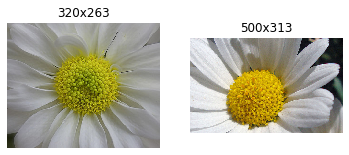

Class: dandelion


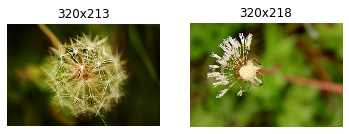

Class: roses


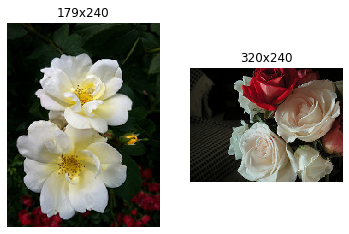

Class: sunflowers


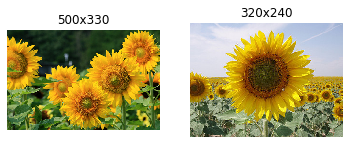

Class: tulips


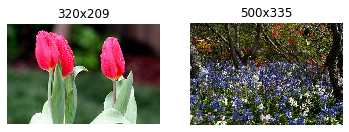

In [12]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

n_examples_per_class = 5

for flower_class in flower_classes:
    print("Class:", flower_class)
    fig, axes = plt.subplots(1, 2)
    for i, ax in enumerate(axes):
        img_path = image_paths[flower_class][i]
        example_image = mpimg.imread(img_path)
        ax.set_title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
        ax.imshow(example_image)
        ax.axis("off")
    plt.show()

# Random Cropping

In [13]:
from skimage.transform import resize
import numpy as np

def prepare_image(image, target_width=299, target_height=299, max_zoom=0.2):
    """Zooms and crops the image randomly for data augmentation."""

    # First, let's find the largest bounding box size that fits within the image
    height, width = image.shape[0], image.shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = width if crop_vertically else int(height * target_image_ratio)
    crop_height = int(width / target_image_ratio) if crop_vertically else height
        
    # Now let's shrink this bounding box by a random factor
    resize_factor = np.random.rand() * max_zoom + 1.0
    crop_width = int(crop_width / resize_factor)
    crop_height = int(crop_height / resize_factor)
    
    # Next, we can select a random location on the image for this bounding box.
    x0 = np.random.randint(0, width - crop_width)
    y0 = np.random.randint(0, height - crop_height)
    x1 = x0 + crop_width
    y1 = y0 + crop_height
    
    image = image[y0:y1, x0:x1] # crop the image
    if np.random.rand() < 0.5: image = np.fliplr(image) # fliplr with 50% probability

    # Now, let's resize the image to the target dimensions.
    # scikit-image will automatically transform the image to floats ranging from 0.0 to 1.0
    image = resize(image, (target_width, target_height))

    return image.astype(np.float32) # represented as 32-bit floats

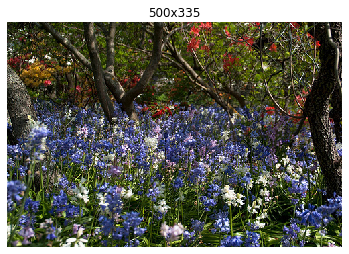

In [14]:
plt.figure(figsize=(6, 8))
plt.imshow(example_image)
plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
plt.axis("off")
plt.show()

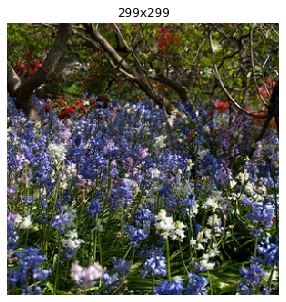

In [15]:
prepared_image = prepare_image(example_image)

plt.figure(figsize=(5, 5))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

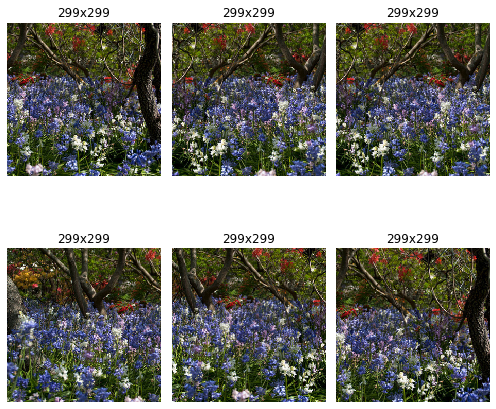

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(7, 7))
for ax in axes.reshape((-1,)):
    prepared_image = prepare_image(example_image)
    ax.set_title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
    ax.imshow(prepared_image)
    ax.axis("off")
plt.tight_layout()
plt.show()

# Random Cropping with TensorFlow

In [17]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
tf.set_random_seed(0)
np.random.seed(0)

In [18]:
def pre_process_image(image, training):
    """Zooms and crops the image randomly for data augmentation."""
    image = image / 255.
    
    target_height = 299
    target_width = 299
    num_channels = 3
    
    if training:

        # Randomly crop the input image.
        image = tf.random_crop(image, size=[target_height, target_width, num_channels])

        # Randomly flip the image horizontally.
        image = tf.image.random_flip_left_right(image)
        
        # Randomly adjust hue, contrast and saturation.
        image = tf.image.random_hue(image, max_delta=0.05)
        image = tf.image.random_contrast(image, lower=0.3, upper=1.0)
        image = tf.image.random_brightness(image, max_delta=0.2)
        image = tf.image.random_saturation(image, lower=0.0, upper=2.0)

        # Limit the image pixels between [0, 1] in case of overflow.
        image = tf.minimum(image, 1.0)
        image = tf.maximum(image, 0.0)
        
    else:
        # Crop the input image around the centre so it is the same
        # size as images that are randomly cropped during training.
        image = tf.image.resize_image_with_crop_or_pad(image,
                                                       target_height=target_height,
                                                       target_width=target_width)
    return image

In [19]:
def pre_process(images_placeholder, training):
    images = tf.map_fn(lambda image: pre_process_image(image, training), images_placeholder)
    return images

In [20]:
x = tf.placeholder(tf.float32, shape=[None, None, None, 3], name='x')
distorted_images = pre_process(images_placeholder=x, training=True)
resized_images = pre_process(images_placeholder=x, training=False)

(1, 299, 299, 3) 1.0 0.0


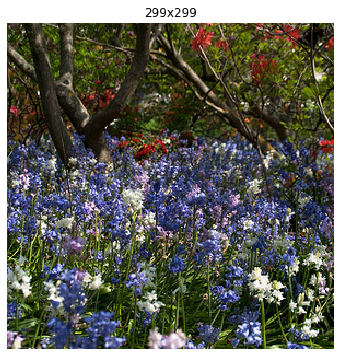

In [21]:
with tf.Session():
    feed_dict = {x: example_image[None,:,:,:]}
    imgs = resized_images.eval(feed_dict=feed_dict)
    print(imgs.shape, np.max(imgs), np.min(imgs))
    
plt.figure(figsize=(6, 6))
plt.imshow(np.squeeze(imgs))
plt.title("{}x{}".format(imgs.shape[2], imgs.shape[1]))
plt.axis("off")
plt.show()

(1, 299, 299, 3) 0.68254066 0.08407079


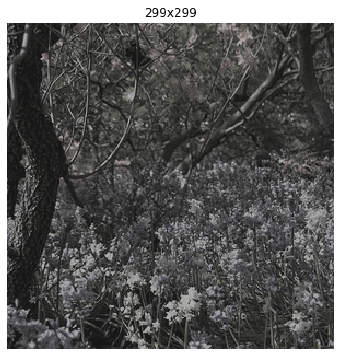

In [22]:
with tf.Session():
    feed_dict = {x: example_image[None,:,:,:]}
    imgs = distorted_images.eval(feed_dict=feed_dict)
    print(imgs.shape, np.max(imgs), np.min(imgs))
    
plt.figure(figsize=(6, 6))
plt.imshow(np.squeeze(imgs))
plt.title("{}x{}".format(imgs.shape[2], imgs.shape[1]))
plt.axis("off")
plt.show()

# Inception v3 Download

In [23]:
%matplotlib inline
import urllib.request
import tarfile
import zipfile
import os
import sys

In [24]:
def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("\rDownloading: {}%".format(percent))
    sys.stdout.flush()

In [25]:
url = 'http://download.tensorflow.org/models/inception_v3_2016_08_28.tar.gz'
filename = url.split('/')[-1]

download_dir = 'model/inception/'
file_path = os.path.join(download_dir, filename)

In [26]:
if not os.path.exists(file_path):
    if not os.path.exists(download_dir):
        os.makedirs(download_dir)
    
    print("Downloading", filename, "...")
    file_path, _ = urllib.request.urlretrieve(url=url,
                                              filename=file_path,
                                              reporthook=download_progress)
    print("Done.")
    
    print("Extracting files.")
    if file_path.endswith(".zip"):
        zipfile.ZipFile(file=file_path, mode="r").extractall(download_dir)
    elif file_path.endswith((".tar.gz", ".tgz")):
        tarfile.open(name=file_path, mode="r:gz").extractall(download_dir)
    print("Done.")

In [27]:
if os.path.exists(file_path):
    print("Data has apparently already been downloaded and unpacked.")

Data has apparently already been downloaded and unpacked.


# Construct class_names List

In [28]:
import re

CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)

def load_class_names():
    path = os.path.join("model", "inception", "imagenet_class_names.txt")
    with open(path, encoding="utf-8") as f:
        content = f.read()
        return CLASS_NAME_REGEX.findall(content)

In [29]:
# The list of class names is available at https://goo.gl/brXRtZ, 
# but you must insert a "background" class at the beginning.
class_names = ["background"] + load_class_names()

In [30]:
class_names[:5]

['background',
 'tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri']

In [31]:
msg = 'Index : {}\nClass Name: {}\n' 
for i in range(10,50,10):
    print(msg.format(i, class_names[i]))

Index : 10
Class Name: ostrich, Struthio camelus

Index : 20
Class Name: chickadee

Index : 30
Class Name: axolotl, mud puppy, Ambystoma mexicanum

Index : 40
Class Name: common iguana, iguana, Iguana iguana



# Restore Graph

In [131]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim
import numpy as np
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)
np.random.seed(42)

In [132]:
lr = 1e-3
epoch = 100
batch_size = 100

In [133]:
# modified
graph = tf.Graph()
with graph.as_default(): 

    # image scales should be [0, 1]
    x = tf.placeholder(tf.float32, shape=[None, None, None, 3]) 
    is_training = tf.placeholder(tf.bool, shape=[]) 
    
    img = tf.cond(is_training, 
                 lambda: pre_process(images_placeholder=x, training=True),
                 lambda: pre_process(images_placeholder=x, training=False))

    # convert image_size to [299, 299]
    img = tf.image.resize_bilinear(img, [299, 299], align_corners=False)

    # rescale image scales to [-1, 1]
    img = 2 * img - 1

    with slim.arg_scope(inception.inception_v3_arg_scope()):
        logits_inception_v3, end_points = inception.inception_v3(
            img, num_classes=1001, is_training=False)
    
    saver_inception_v3 = tf.train.Saver()
    
    init_w = tf.keras.initializers.VarianceScaling(mode='fan_avg')
    init_b = tf.keras.initializers.zeros()
    
    w = tf.get_variable('w', [1001,5], tf.float32, init_w)
    b = tf.get_variable('b', [5,], tf.float32, init_b)
    
    logits = logits_inception_v3@w+b 
    y = tf.placeholder(tf.float32, shape=[None, 5]) 
    y_cls = tf.placeholder(tf.int32, shape=[None,]) 
    entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=logits)
    loss = tf.reduce_mean(entropy)
    opt = tf.train.AdamOptimizer(lr)
    train = opt.minimize(loss)
     
    correct = tf.nn.in_top_k(logits, y_cls, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
    init = tf.global_variables_initializer()
    saver = tf.train.Saver() 

In [122]:
# all_tensors = [tensor for op in graph.get_operations() for tensor in op.values()]
# for tensor in all_tensors:
#     print(tensor)

In [134]:
flower_class_ids = {flower_class: index for index, flower_class in enumerate(flower_classes)}
flower_class_ids

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [135]:
flower_paths_and_classes = []
for flower_class, paths in image_paths.items():
    for path in paths:
        flower_paths_and_classes.append((path, flower_class_ids[flower_class]))

In [136]:
test_ratio = 0.2
train_size = int(len(flower_paths_and_classes) * (1 - test_ratio))

np.random.shuffle(flower_paths_and_classes)

flower_paths_and_classes_train = flower_paths_and_classes[:train_size]
flower_paths_and_classes_test = flower_paths_and_classes[train_size:]

In [137]:
flower_paths_and_classes_train[:3]

[('datasets/flowers/flower_photos/daisy/19834392829_7d697871f6.jpg', 0),
 ('datasets/flowers/flower_photos/sunflowers/5957007921_62333981d2_n.jpg', 3),
 ('datasets/flowers/flower_photos/tulips/7166635566_ee240b5408_n.jpg', 4)]

In [138]:
from random import sample

def prepare_batch(flower_paths_and_classes, batch_size, channels=3):
    batch_paths_and_classes = sample(flower_paths_and_classes, batch_size)
    images = [mpimg.imread(path)[:, :, :channels] for path, labels in batch_paths_and_classes]
    prepared_images = [prepare_image(image) for image in images]
    X_batch = np.stack(prepared_images) # My Inception Code expects colors ranging from 0 to 1
    y_batch = np.array([labels for path, labels in batch_paths_and_classes], dtype=np.int32)
    return X_batch, np.eye(5)[y_batch], y_batch

In [139]:
from random import sample

def prepare_batch_train(flower_paths_and_classes, batch_size, channels=3):
    batch_paths_and_classes = sample(flower_paths_and_classes, batch_size)
    X_batch = [mpimg.imread(path)[:, :, :channels] for path, labels in batch_paths_and_classes]
    y_batch = np.array([labels for path, labels in batch_paths_and_classes], dtype=np.int32)
    return np.array(X_batch), np.eye(5)[y_batch], y_batch

In [140]:
X_batch, y_batch, y_batch_cls = prepare_batch(flower_paths_and_classes_train, batch_size=100)
print(X_batch.shape, y_batch.shape, y_batch_cls.shape)

(100, 299, 299, 3) (100, 5) (100,)


In [141]:
x_test = [mpimg.imread(path)[:, :, :3] 
                   for path, labels in flower_paths_and_classes_test]
x_test = [prepare_image(image) for image in x_test]
x_test = np.stack(x_test)
y_test_cls = np.array([labels 
                       for path, labels in flower_paths_and_classes_test], dtype=np.int32)
y_test = np.eye(5)[y_test_cls]

In [142]:
INCEPTION_PATH = os.path.join("model", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")

In [143]:
with tf.Session(graph=graph) as sess:
    saver_inception_v3.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    init.run()

    loss_trace = []
    
    for i in range(epoch):
        print("Epoch", i, end=" ")
        for _ in range(len(flower_paths_and_classes_train) // batch_size):
            print(".", end="")
            x_batch, y_batch, y_batch_cls = prepare_batch(flower_paths_and_classes_train, batch_size)
            feed_dict = {x:x_batch, y:y_batch, y_cls:y_batch_cls, is_training: True}
            loss_run, _ = sess.run([loss, train], feed_dict=feed_dict)
            loss_trace.append(loss_run)
        #print(end='\n')
        print(end=' ')
        
        feed_dict = {x:x_test, y:y_test, y_cls:y_test_cls, is_training: False}
        accuracy_run = sess.run(accuracy, feed_dict=feed_dict)
        print('Test Accuracy :', accuracy_run)

INFO:tensorflow:Restoring parameters from model/inception/inception_v3.ckpt
Epoch 0.............................
Test Accuracy : 0.260218
Epoch 1.

KeyboardInterrupt: 

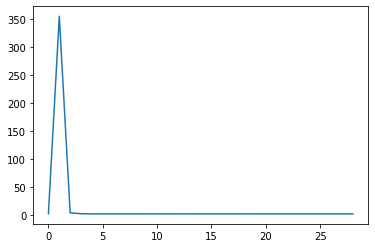

In [94]:
plt.plot(loss_trace)
plt.show()